In [156]:
import torch
import torchvision
import torchvision.transforms as transforms

In [157]:
transform = transforms.Compose(
    [transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [158]:
trainset = torchvision.datasets.CIFAR10(root = "./cifar10-data",
                                       train = True, transform = transform , download = True)
trainloader = torch.utils.data.DataLoader(trainset , batch_size = 32,
                                         shuffle = True , num_workers = 2 , pin_memory=True)

testset = torchvision.datasets.CIFAR10(
    root = "./cifar10-data" , train = False , download = True, transform = transform
)

testloader = torch.utils.data.DataLoader(
    testset , batch_size = 4 , shuffle = False , num_workers=2 , pin_memory=True
)

Files already downloaded and verified
Files already downloaded and verified


 deer   cat horse   car


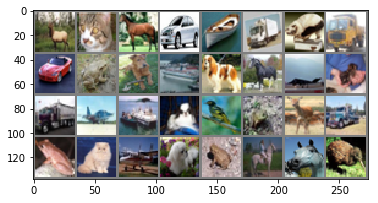

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [160]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,10,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(10,20,5)
        self.fc1 = nn.Linear(20*5*5 , 120)
        self.drop = nn.Dropout2d()
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1 , 20*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.drop(x)
        x = self.fc3(x)
        return x

In [161]:
cuda = True

In [162]:
model = Net()
if cuda:
    model.cuda()

In [163]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters() , lr = 0.01 , momentum = 0.9)


In [164]:
for epoch in range(10):
    running_loss = 0
    
    for i, data in enumerate(trainloader , 0):
        inputs,labels = data
        
        if cuda:
            inputs , labels = inputs.cuda() , labels.cuda()
        inputs , labels = Variable(inputs) , Variable(labels)
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if i%200 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print("Finished Training")

[1,     1] loss: 0.001
[1,   201] loss: 0.225
[1,   401] loss: 0.200
[1,   601] loss: 0.183
[1,   801] loss: 0.173
[1,  1001] loss: 0.165
[1,  1201] loss: 0.159
[1,  1401] loss: 0.154
[2,     1] loss: 0.001
[2,   201] loss: 0.146
[2,   401] loss: 0.143
[2,   601] loss: 0.141
[2,   801] loss: 0.139
[2,  1001] loss: 0.136
[2,  1201] loss: 0.136
[2,  1401] loss: 0.135
[3,     1] loss: 0.001
[3,   201] loss: 0.125
[3,   401] loss: 0.127
[3,   601] loss: 0.126
[3,   801] loss: 0.127
[3,  1001] loss: 0.124
[3,  1201] loss: 0.127
[3,  1401] loss: 0.124
[4,     1] loss: 0.000
[4,   201] loss: 0.116
[4,   401] loss: 0.115
[4,   601] loss: 0.114
[4,   801] loss: 0.119
[4,  1001] loss: 0.115
[4,  1201] loss: 0.116
[4,  1401] loss: 0.116
[5,     1] loss: 0.001
[5,   201] loss: 0.110
[5,   401] loss: 0.109
[5,   601] loss: 0.110
[5,   801] loss: 0.112
[5,  1001] loss: 0.109
[5,  1201] loss: 0.111
[5,  1401] loss: 0.110
[6,     1] loss: 0.000
[6,   201] loss: 0.104
[6,   401] loss: 0.103
[6,   601] 

In [165]:
dataiter = iter(testloader)

images , labels = dataiter.next()



GroundTruth:    cat  ship  ship plane
Predicted:   ship  ship truck  ship


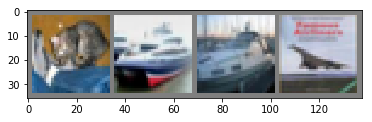

In [166]:
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: " , ' '.join('%5s'%classes[labels[j]] for j in range(4)))
if cuda:
    images , labels = images.cuda() , labels.cuda()
outputs = model(Variable(images))
_ , predicted = torch.max(outputs.data , 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
for j in range(4)))

In [167]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    
    if cuda:
        images , labels = images.cuda() , labels.cuda()
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [168]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    
    if cuda:
        images , labels = images.cuda() , labels.cuda()
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 76 %
Accuracy of  bird : 43 %
Accuracy of   cat : 45 %
Accuracy of  deer : 62 %
Accuracy of   dog : 58 %
Accuracy of  frog : 58 %
Accuracy of horse : 62 %
Accuracy of  ship : 79 %
Accuracy of truck : 77 %
